In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# learning_rates:[1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# w = w + grad * learning_rate

learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    
    optimizer = keras.optimizers.SGD(lr)
    
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    
    history = model.fit(x_train_scaled, y_train,
                       validation_data=(x_valid_scaled, y_valid),
                       epochs=100,
                       callbacks = callbacks)
    histories.append(history)

Epoch 1/100
363/363 [==============================] - 0s 670us/step - loss: 5.1865 - val_loss: 4.5304
Epoch 2/100
363/363 [==============================] - 0s 429us/step - loss: 3.6621 - val_loss: 3.2759
Epoch 3/100
363/363 [==============================] - 0s 431us/step - loss: 2.6704 - val_loss: 2.4479
Epoch 4/100
363/363 [==============================] - 0s 424us/step - loss: 2.0140 - val_loss: 1.8938
Epoch 5/100
363/363 [==============================] - 0s 426us/step - loss: 1.5754 - val_loss: 1.5203
Epoch 6/100
363/363 [==============================] - 0s 423us/step - loss: 1.2817 - val_loss: 1.2681
Epoch 7/100
363/363 [==============================] - 0s 420us/step - loss: 1.0844 - val_loss: 1.0980
Epoch 8/100
363/363 [==============================] - 0s 423us/step - loss: 0.9517 - val_loss: 0.9827
Epoch 9/100
363/363 [==============================] - 0s 420us/step - loss: 0.8617 - val_loss: 0.9032
Epoch 10/100
363/363 [==============================] - 0s 428us/step - l

Epoch 29/100
363/363 [==============================] - 0s 419us/step - loss: 0.5606 - val_loss: 0.6088
Epoch 30/100
363/363 [==============================] - 0s 424us/step - loss: 0.5571 - val_loss: 0.6047
Epoch 31/100
363/363 [==============================] - 0s 425us/step - loss: 0.5536 - val_loss: 0.6008
Epoch 32/100
363/363 [==============================] - 0s 409us/step - loss: 0.5502 - val_loss: 0.5971
Epoch 33/100
363/363 [==============================] - 0s 415us/step - loss: 0.5470 - val_loss: 0.5934
Epoch 34/100
363/363 [==============================] - 0s 422us/step - loss: 0.5438 - val_loss: 0.5897
Epoch 35/100
363/363 [==============================] - 0s 426us/step - loss: 0.5408 - val_loss: 0.5862
Epoch 36/100
363/363 [==============================] - 0s 420us/step - loss: 0.5378 - val_loss: 0.5826
Epoch 37/100
363/363 [==============================] - 0s 420us/step - loss: 0.5349 - val_loss: 0.5792
Epoch 38/100
363/363 [==============================] - 0s 415us

363/363 [==============================] - 0s 433us/step - loss: 0.4277 - val_loss: 0.4515
Epoch 12/100
363/363 [==============================] - 0s 420us/step - loss: 0.4240 - val_loss: 0.4444
Epoch 13/100
363/363 [==============================] - 0s 418us/step - loss: 0.4190 - val_loss: 0.4426
Epoch 14/100
363/363 [==============================] - 0s 419us/step - loss: 0.4152 - val_loss: 0.4403
Epoch 15/100
363/363 [==============================] - 0s 431us/step - loss: 0.4121 - val_loss: 0.4368
Epoch 16/100
363/363 [==============================] - 0s 431us/step - loss: 0.4108 - val_loss: 0.4338
Epoch 17/100
363/363 [==============================] - 0s 429us/step - loss: 0.4073 - val_loss: 0.4335
Epoch 18/100
363/363 [==============================] - 0s 434us/step - loss: 0.4100 - val_loss: 0.4297
Epoch 19/100
363/363 [==============================] - 0s 434us/step - loss: 0.4058 - val_loss: 0.4235
Epoch 20/100
363/363 [==============================] - 0s 423us/step - loss:

D:\software\anaconda\lib\site-packages\tensorflow\python\keras\callbacks.py:1664: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


363/363 [==============================] - 0s 420us/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 0s 429us/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 0s 420us/step - loss: nan - val_loss: nan


learning_rate 0.0001


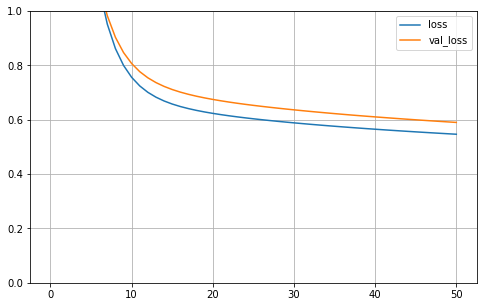

learning_rate 0.0003


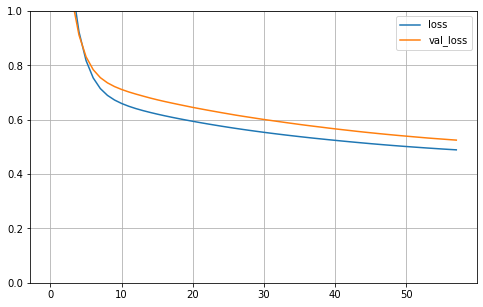

learning_rate 0.001


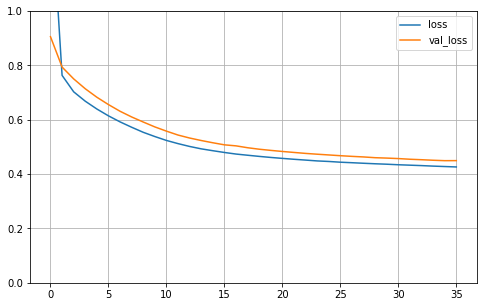

learning_rate 0.003


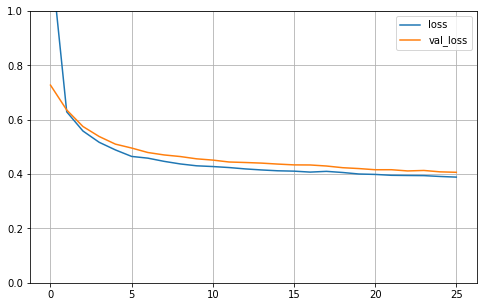

learning_rate 0.01


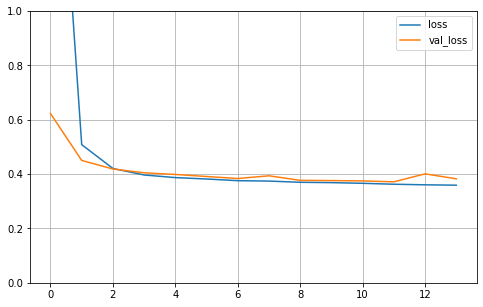

learning_rate 0.03


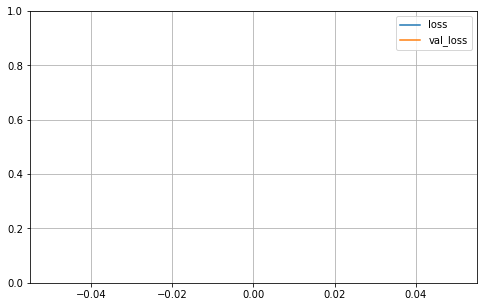

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rates, histories):
    print("learning_rate", lr)
    plot_learning_curves(history)